In [2]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [8]:
#import libraries
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import os

# for accuracy and loss graph
import matplotlib.pyplot as plt

In [6]:
keras.__version__

'2.12.0'

In [15]:
train_data_path = "C:/Users/ASUS/OneDrive/Desktop/train"
validation_data_path = "C:/Users/ASUS/OneDrive/Desktop/val"

In [16]:
# show augmented images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [17]:
# this is the augmentation configuration we will use for training
# It generate more images using below parameters
training_datagen = ImageDataGenerator(rescale=1./255,
                                      rotation_range=40,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      horizontal_flip=True,
                                      fill_mode='nearest')

# this is a generator that will read pictures found in
# at train_data_path, and indefinitely generate
# batches of augmented image data
training_data = training_datagen.flow_from_directory(train_data_path, # this is the target directory
                                      target_size=(150, 150), # all images will be resized to 150x150
                                      batch_size=32,
                                      class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 1951 images belonging to 4 classes.


In [18]:
training_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [19]:
# this is the augmentation configuration we will use for validation:
# only rescaling
valid_datagen = ImageDataGenerator(rescale=1./255)

# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


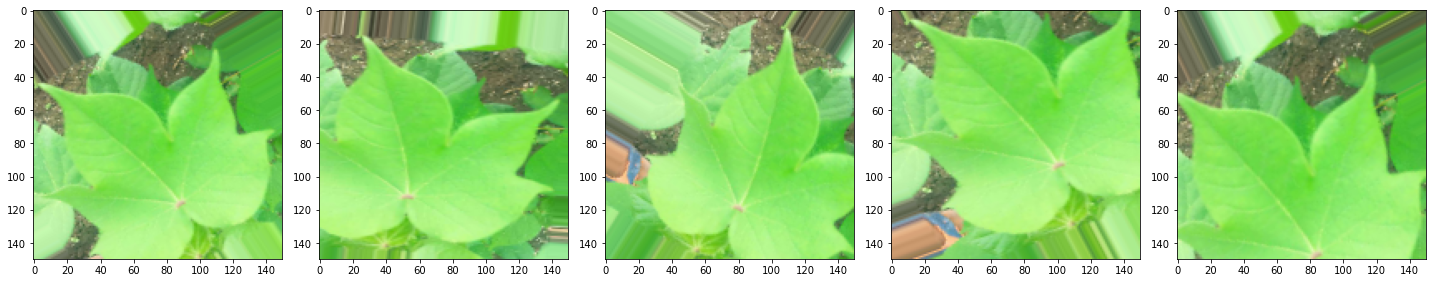

In [20]:
# showing augmented images
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [26]:
# save best model using vall accuracy
model_path = 'C:/Users/ASUS/OneDrive/Desktop/v3_pred_cott_dis.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [27]:
#Building cnn model
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),

                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), # neural network beulding
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])


# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [28]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [29]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=500, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/500
61/61 [==============================] - ETA: 0s - loss: 1.2592 - accuracy: 0.4449
Epoch 1: val_accuracy improved from -inf to 0.41667, saving model to C:/Users/ASUS/OneDrive/Desktop\v3_pred_cott_dis.h5
61/61 [==============================] - 36s 579ms/step - loss: 1.2592 - accuracy: 0.4449 - val_loss: 1.1293 - val_accuracy: 0.4167
Epoch 2/500
61/61 [==============================] - ETA: 0s - loss: 1.0691 - accuracy: 0.5372
Epoch 2: val_accuracy improved from 0.41667 to 0.50000, saving model to C:/Users/ASUS/OneDrive/Desktop\v3_pred_cott_dis.h5
61/61 [==============================] - 38s 626ms/step - loss: 1.0691 - accuracy: 0.5372 - val_loss: 0.9949 - val_accuracy: 0.5000
Epoch 3/500
61/61 [==============================] - ETA: 0s - loss: 0.9608 - accuracy: 0.6007
Epoch 3: val_accuracy improved from 0.50000 to 0.69444, saving model to C:/Users/ASUS/OneDrive/Desktop\v3_pred_cott_dis.h5
61/61 [==============================] - 37s 603ms/step - loss: 0.9608 - accuracy: 0.

In [31]:
model_path2 = "C:/Users/ASUS/OneDrive/Desktop/v3_pred_cott_dis.h5"
cnn_model.save(model_path2)

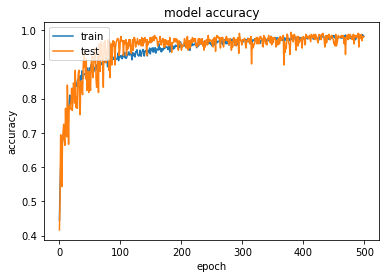

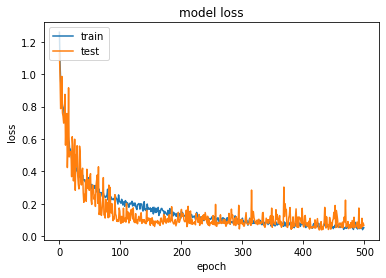

In [32]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [33]:
history.history

{'loss': [1.2592326402664185,
  1.069091796875,
  0.9608306288719177,
  0.8871111273765564,
  0.8399430513381958,
  0.8068567514419556,
  0.7957724928855896,
  0.7828635573387146,
  0.7371810078620911,
  0.7541536688804626,
  0.6969267129898071,
  0.672638475894928,
  0.6445817351341248,
  0.6668118238449097,
  0.6339911818504333,
  0.5944055318832397,
  0.5776157975196838,
  0.5217761993408203,
  0.5364341139793396,
  0.5074041485786438,
  0.48122912645339966,
  0.4785176217556,
  0.4597044587135315,
  0.4359859526157379,
  0.44838112592697144,
  0.43283024430274963,
  0.43089020252227783,
  0.4203645884990692,
  0.4033631384372711,
  0.41989731788635254,
  0.385357141494751,
  0.38400426506996155,
  0.37652069330215454,
  0.3644520044326782,
  0.39195725321769714,
  0.3620264232158661,
  0.3683670461177826,
  0.3343866467475891,
  0.37727615237236023,
  0.3454214632511139,
  0.3469337224960327,
  0.34856194257736206,
  0.33576610684394836,
  0.33604079484939575,
  0.34390267729759216